In [18]:
import sys
import os
#sys.path.append('D:\\software_git_repos\\cofe-python-analysis-tools\\utils_meinhold')
sys.path.append('../utils_meinhold')
#sys.path.append('D:\\software_git_repos\\cofe-python-analysis-tools\\utils_zonca')
sys.path.append('../utils_zonca')
#sys.path.append('D:\\software_git_repos\\cofe-python-analysis-tools\\utils_zonca\\pointing')
sys.path.append('../utils_zonca/pointing')
sys.path.append('../utils_zonca/demod')
#sys.path.append('D:\\software_git_repos\\greenpol')
sys.path.append('../')
#sys.path.append('D:\\software_git_repos\\greenpol\\telescope_control\\')
sys.path.append('../telescope_control')
#sys.path.append('D:\\software_git_repos\\greenpol\\telescope_control\\VtoT\\')
sys.path.append('../VtoT')
import convert
import realtime_gp as rt
import numpy as np
from datetime import datetime
import h5py
#import pandas as pd
#from pointingtools import compute_parallactic_angle, altaz2ha 
#from planets import getlocation, getpointing
import warnings
#from astropy.coordinates import AltAz, Angle, EarthLocation, ICRS, SkyCoord, frame_transform_graph
#from astropy import units as u
#import ephem
import matplotlib.pyplot as plt
import time
#import planets
from datetime import timedelta
#import numpy.ma as ma
import cofe_util as cu

import Tkinter,tkFileDialog

from Tkinter import *
import ttk

import pickle
import glob

import cPickle

import utils

import datparsing

from scipy.optimize import curve_fit

#from functions import *

from uncertainties import ufloat
from uncertainties.umath import *

%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\labuser\anaconda3\envs\py27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['fmod', 'sinh', 'trunc', 'Text', 'tan', 'gamma', 'cosh', 'radians', 'sin', 'expm1', 'ldexp', 'Button', 'exp', 'datetime', 'frexp', 'ceil', 'copysign', 'Widget', 'degrees', 'cos', 'tanh', 'fabs', 'sqrt', 'hypot', 'log', 'log10', 'log1p', 'floor', 'modf', 'isinf', 'isnan']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [20]:
def get_file_times(fld, offset):
    startfile = fld[0][:43] + fld[0][49:-2] + 'dat'
    endfile = fld[-1][:43] + fld[-1][49:-2] + 'dat'

    # starttime = os.path.getctime(startfile)
    starttime = os.stat(startfile).st_mtime + offset * 3600
    starttime = datetime.datetime.fromtimestamp(starttime)

    # endtime = os.path.getctime(endfile)
    endtime = os.stat(endfile).st_mtime + offset * 3600
    endtime = datetime.datetime.fromtimestamp(endtime)

    return starttime, endtime

In [21]:
def vary_phase(chan,file_list):
#loop over a full range of phase offsets to determine maximum polarization (Q) signal
#For horn 2 us ch4 =H2 Hi AC. We find maximum Q signal, even though test had maximum negative Q
#because the Temperature calibration will change the sign of the data
    qvsphase={}
    phases=[]
    qmeans=[]
    umeans=[]
    figure()
    for phase_offset in arange(0,65):    
        print(phase_offset)
        phases.append(phase_offset)
        j=rt.get_demodulated_data_from_list(filelist=file_list,phase_offset=phase_offset)
        qmeans.append(np.max(j[chan]['Q']))
        umeans.append(np.max(j[chan]['U']))
        plot(j[chan]['Q'],label='Q '+ str(phase_offset))
    legend()
    title('Q,U vs phase offset for ' + rt.chantoname(chan))
    qvsphase['phases']=phases
    qvsphase['qmeans']=qmeans
    qvsphase['umeans']=umeans
    figure()
    plot(qvsphase['phases'],qvsphase['qmeans'],label='Q ' + rt.chantoname(chan))
    plot(qvsphase['phases'],qvsphase['umeans'],label='U ' + rt.chantoname(chan))
    title('Q,U (volts) vs phase for -Q signal')
    xlabel('Phase offset, [encoder counts]')
    ylabel('Q (U) [Volts]')
    legend()
    grid()
    return qvsphase

In [8]:
dd={}

In [9]:
#dfile = ['D:/software_git_repos/polaris/polaris_data/data/20201028/09525700.dat']

In [6]:
dfile = ['D:/software_git_repos/polaris/polaris_data/data/20180205/14322500.dat']

In [7]:
raw_data = rt.demod.open_raw(dfile[0])
#raw_data2 = rt.demod.open_raw(dfile2[0])

In [8]:
print len(raw_data)/255998.

1.00000390628


TypeError: Cannot cast array data from dtype([('ch0', '<u2'), ('ch1', '<u2'), ('ch2', '<u2'), ('ch3', '<u2'), ('ch4', '<u2'), ('ch5', '<u2'), ('ch6', '<u2'), ('ch7', '<u2'), ('ch8', '<u2'), ('ch9', '<u2'), ('ch10', '<u2'), ('ch11', '<u2'), ('ch12', '<u2'), ('ch13', '<u2'), ('ch14', '<u2'), ('ch15', '<u2'), ('enc', '<u2'), ('dummy', '<u2'), ('rev0', '<u2'), ('rev1', '<u2'), ('rev2', '<u2')]) to dtype('float64') according to the rule 'unsafe'

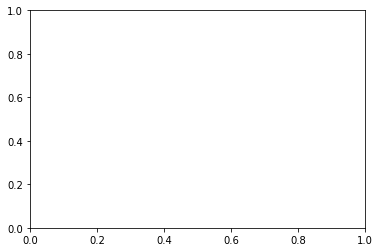

In [9]:
plt.figure()
plt.plot(raw_data)

In [10]:
enc = raw_data['enc'][:30000]
enc = np.mod(enc+6,4096)

data = utils.adu2volts(raw_data[rt.nametochan('H3HiAC')])[:30000]

In [11]:
print enc.max()

4091


Text(0.5,1,'H3 raw data Tau A crossing')

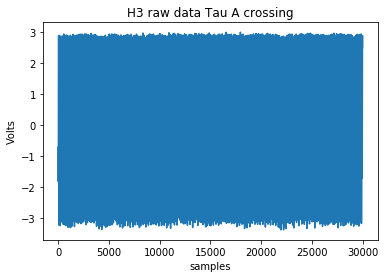

In [12]:
plt.figure()
plt.plot(data)
plt.xlabel('samples')
plt.ylabel('Volts')
plt.title('H3 raw data Tau A crossing')

In [13]:
isort = np.argsort(enc)
ienc = enc[isort]*1
idata = data[isort]*1

Text(0.5,1,'H3 raw data Tau A crossing')

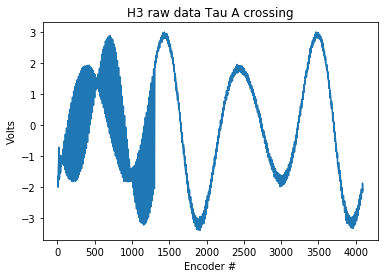

In [14]:
plt.figure()
plt.plot(ienc, idata)
plt.xlabel('Encoder #')
plt.ylabel('Volts')
plt.title('H3 raw data Tau A crossing')

In [15]:
print idata.shape

(30000L,)


In [16]:
print idata.shape

(30000L,)


In [23]:
qvsphase_h3=vary_phase(chan='ch8',file_list=dfile)

0


1001
16
1


1001
16
2


1001
16
3


1001
16
4


1001
16
5


1001
16
6


1001
16
7


1001
16
8


1001
16
9


1001
16
10


1001
16
11


1001
16
12


1001
16
13


1001
16
14


1001
16
15


1001
16
16


1001
16
17


1001
16
18


1001
16
19


1001
16
20


1001
16
21


1001
16
22


1001
16
23


1001
16
24


1001
16
25


1001
16
26


1001
16
27


1001
16
28


1001
16
29


1001
16
30


1001
16
31


1001
16
32


1001
16
33


1001
16
34


1001
16
35


1001
16
36


1001
16
37


1001
16
38


1001
16
39


1001
16
40


1001
16
41


1001
16
42


1001
16
43


1001
16
44


1001
16
45


1001
16
46


1001
16
47


1001
16
48


1001
16
49


1001
16
50


1001
16
51


1001
16
52


1001
16
53


1001
16
54


1001
16
55


1001
16
56


1001
16
57


1001
16
58


1001
16
59


1001
16
60


1001
16
61


1001
16
62


1001
16
63


1001
16
64


1001
16


In [24]:
phase = np.array(qvsphase_h3['phases'])
qmean = np.array(qvsphase_h3['qmeans'])
umean = np.array(qvsphase_h3['umeans'])

In [25]:
chan = 'ch8'

In [21]:
plt.figure()
plt.plot(phase,qmean,label='Q ' + (chan))
plt.plot(phase,umean,label='U ' + (chan))
plt.title('Q,U (volts) vs phase for -Q signal')
plt.xlabel('Phase offset, [encoder counts]')
plt.ylabel('Q (U) [Volts]')
plt.legend()
plt.grid()

In [41]:
imax = phase[qmean == qmean.max()][0]
imin = phase[qmean == qmean.min()]

iumax = phase[umean == umean.max()]
iumin = phase[umean == umean.min()]

In [42]:
imax

0

In [43]:
ddmax = rt.get_demodulated_data_from_list(filelist=dfile, phase_offset=imax)
ddmin = rt.get_demodulated_data_from_list(filelist=dfile, phase_offset=imin)

dd = rt.get_demodulated_data_from_list(filelist=dfile,phase_offset=0)


1001
16


1001
16


1001
16


In [44]:
Tbase = dd['ch8']['T'][277:].mean()
Qbase = ddmax['ch8']['Q'][277:].mean()
Ubase = ddmax['ch8']['U'][277:].mean()

Tbaseerr = dd['ch8']['T'][277:].std()
Qbaseerr = ddmax['ch8']['Q'][277:].std()
Ubaseerr = ddmax['ch8']['U'][277:].std()

Tbase = ufloat(Tbase, Tbaseerr)
Qbase = ufloat(Qbase, Qbaseerr)
Ubase = ufloat(Ubase, Ubaseerr)

Tmin = dd['ch8']['T'].min()
Qmin = ddmax['ch8']['Q'].min()
Umax = ddmax['ch8']['U'].max()

Tsignal = (Tbase - Tmin)*1e3
Qsignal = (Qbase - Qmin)*1e3
Usignal = (Umax - Ubase)*1e3

#Tsignalerr = Tbaseerr*1e3
#Qsignalerr = Qbaseerr*1e3
#Usignalerr = Ubaseerr*1e3

Psignal = (Qsignal**2 + Usignal**2)**(0.5)

In [55]:
plt.figure()
plt.plot(dd['ch8']['T'][277:])

In [45]:
iQmin = np.where(ddmax['ch8']['Q'] == ddmax['ch8']['Q'].min())
IUmax = np.where(ddmax['ch8']['U'] == ddmax['ch8']['U'].min())

Qbase = ddmax['ch8']['Q'][277:].mean()
Ubase = ddmax['ch8']['U'][277:].mean()

In [46]:
Q_max = []
U_max = []

Q_signal_max = []
U_signal_max = []

for p in phase:
    data_max = rt.get_demodulated_data_from_list(filelist=dfile, phase_offset=p)
    
    Qm = data_max['ch8']['Q'][iQmin]
    Um = data_max['ch8']['U'][iQmin]
    
    Q_base = data_max['ch8']['Q'][277:].mean()
    U_base = data_max['ch8']['U'][277:].mean()
    
    Q_signal = (Q_base - Qm)
    U_signal = (U_base - Um)
    
    Q_max.append(Qm)
    U_max.append(Um)
    
    Q_signal_max.append(Q_signal)
    U_signal_max.append(U_signal)

Q_max = np.array(Q_max)
U_max = np.array(U_max)

Q_signal_max = np.array(Q_signal_max)
U_signal_max = np.array(U_signal_max)

1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


In [283]:
plt.figure()
plt.plot(phase, Q_max/U_max, linewidth=2, label='Q/U')
#plt.plot(phase, U_max, linewidth=2, label='U')
plt.title('Tau A Q,U (volts) vs phase')
plt.xlabel('Phase offset, [encoder counts]')
plt.ylabel('Q/U')
#plt.legend()
plt.grid()

In [47]:
P_max = np.sqrt(Q_max**2 + U_max**2)

In [290]:
print (P_max.max()-P_max.min())/P_max.mean()

0.029408393736768755


In [288]:
plt.figure()
plt.plot(phase, P_max, linewidth=2, label='Q/U')
#plt.plot(phase, U_max, linewidth=2, label='U')
plt.title('Tau A total P (volts) vs phase')
plt.xlabel('Phase offset, [encoder counts]')
plt.ylabel('Polarization (V)')
#plt.legend()
plt.grid()

In [96]:
plt.figure()
var1 = 'T'
var2 = 'Q'
var3 = 'U'
#plt.plot(dd['ch8'][var1], label=' %s, phase offset = 0' % var1)
#plt.plot(dd['ch8'][var2], label='%s, phase offset = 0' % var2)
plt.plot(dd['ch8'][var3], label='%s, phase offset = 0' % var3)
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
#plt.plot(ddmax['ch8'][var2], label='%s, phase offset = %d' % (var2, imax))
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
#plt.plot(ddmin['ch8'][var2], label='%s, phase offset = %d' % (var2, imin))
plt.plot(ddmax['ch8'][var3], label='%s, phase offset = %d' % (var3, iumax))
plt.plot(ddmin['ch8'][var3], label='%s, phase offset = %d' % (var3, iumin))
plt.xlabel('samples')
plt.ylabel('Volts')
plt.title('Tau A crossing 10/28/2020')
plt.legend()

In [122]:
plt.figure()
var1 = 'T'
var2 = 'Q'
var3 = 'U'
#plt.plot(dd['ch8'][var1], label=' %s, phase offset = 0' % var1)
plt.plot(dd['ch8'][var2], label='%s, phase offset = 0' % var2)
plt.plot(dd['ch8'][var3], label='%s, phase offset = 0' % var3)
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
plt.plot(ddmax['ch8'][var2], label='%s, phase offset = %d' % (var2, imax))
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
plt.plot(ddmax['ch8'][var3], label='%s, phase offset = %d' % (var3, imax))
plt.plot(ddmin['ch8'][var2], label='%s, phase offset = %d' % (var2, imin))
plt.plot(ddmin['ch8'][var3], label='%s, phase offset = %d' % (var3, imin))
plt.xlabel('samples')
plt.ylabel('Volts')
plt.title('Tau A crossing 10/28/2020')
plt.legend()

In [22]:
dd = {}

In [23]:
dd, fld = read_some_data()

functions.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hf = h5py.File(f)


In [24]:
pp = {}

In [25]:
flp = get_pointing_files()
pp = rt.get_h5_pointing(flp)

../realtime_gp.py:86: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h=h5py.File(f)


In [26]:
combined = rt.combine_cofe_h5_pointing(dd, pp)

In [31]:
plt.figure()
chan = 'H3HiAC'
var = 'T'
plt.plot(combined['sci_data'][rt.nametochan(chan)][var])

In [25]:
fld = ['D:/software_git_repos/polaris/polaris_data/demod_data/20201028/09041300.h5']
starttime, endtime = get_file_times(fld, 7)
dt , ut= rt.convert_gpstime(starttime, combined['gpstime']/1000, format='datetime')
dt = np.asarray(dt)
print dt[0]

NameError: name 'combined' is not defined

In [32]:
chan = 'H3HiAC'

var = 'T'
Tdata = combined['sci_data'][rt.nametochan(chan)][var]

var = 'Q'
Qdata = combined['sci_data'][rt.nametochan(chan)][var]

var = 'U'
Udata = combined['sci_data'][rt.nametochan(chan)][var]

minutes = (ut-ut[0])/60.


In [33]:
idx = [(minutes>43.) & (minutes<55.)][0]

minutes = minutes[idx]

Tdata = Tdata[idx]
Qdata = Qdata[idx]
Udata = Udata[idx]
ut = ut[idx]
dt = dt[idx]

In [156]:
plt.figure()
plt.plot(minutes, Tdata, label='T')
plt.plot(minutes, Qdata, label='Q')
plt.plot(minutes, Udata, label='U')
plt.xlabel('Minutes from start')
plt.ylabel('Signal (V)')
plt.title('Moon Crossing %s' % chan)
plt.legend()

In [35]:
imin = np.where(Tdata==Tdata.min())
print dt[imin]

[datetime.datetime(2020, 10, 28, 9, 59, 42, 383000)]


In [4]:
c = 3e8 # m/s
k = 1.38e-23 # J/K
Ta = 1e-3# mK
h = 6.63e-34 # J*s
FtoJ = 1e26 #flux to jansky conversion

In [29]:
#using slope of line in WMAP paper: https://arxiv.org/pdf/astro-ph/0603450.pdf,  to get flux of tau A at 10 GHz
'''
#use for Tcrab
y1 = 352/FtoJ
y1err = 11/FtoJ
x1 = 22.5e9

y2 = 229/FtoJ
y2err = 11/FtoJ
x2 = 92.9e9

m = np.log10(y2/y1)/np.log10(x2/x1)
b = np.log10(y1) - m*np.log10(x1)

L = np.log10(x2/x1)

merr = np.sqrt((y2err/L/np.log(10)/y2)**2 + (y1err/L/np.log(10)/y1)**2)
berr = np.sqrt((y1err/y1/np.log(10))**2 + (merr*np.log(x1))**2)
'''

#use for Q/Ucrab
y1 = 352/FtoJ
y1err = 11/FtoJ
x1 = 22.5e9

y2 = 229/FtoJ
y2err = 11/FtoJ
x2 = 92.9e9

m = np.log10(y2/y1)/np.log10(x2/x1)
b = np.log10(y1) - m*np.log10(x1)

L = np.log10(x2/x1)

merr = np.sqrt((y2err/L/np.log(10)/y2)**2 + (y1err/L/np.log(10)/y1)**2)
berr = np.sqrt((y1err/y1/np.log(10))**2 + (merr*np.log(x1))**2)
#m = ufloat(m, merr)
#b = ufloat(b, berr)

In [30]:
print(m,b)

(-1.6324753352325576, -8.986374021050693)


In [31]:
def Flux(nu):
    nu = nu*1e9
    return (10**b * nu**m)*FtoJ

In [32]:
Fcrab = Flux(10.)
print Fcrab , ' Jy'
Fcrab = ufloat(Fcrab, 11.)

4.885090644657342  Jy


In [33]:
#polaris numbers
nu = 10e9 # Ghz
l = c/nu # m

fwhm = ufloat(1.31, 0.024) # degrees

In [34]:
#solid angle in sterradians
SA = (fwhm**2)*(np.pi/4/np.log(2)/3282.8)
Ae = l**2 / SA
F = k*Ta/Ae
KtoJ = F*FtoJ
JtoK = 1/KtoJ
Tcrab = Fcrab*JtoK
print JtoK
print JtoK*2
print 'Tcrab: %s mK' % Tcrab

1.10+/-0.04
2.20+/-0.08
Tcrab: 5+/-12 mK


In [26]:
Qcrab = ufloat(33,12)
Tcrab = ufloat(496,22)
Ucrab = ufloat(5,12)

In [41]:
Q = 33
Qerr = 12
U = 5
Uerr = 12
P = np.sqrt(Q**2 + U**2)
Perr = np.sqrt((Q*Qerr)**2 + (U*Uerr)**2)/P

In [43]:
print P, Perr
print P/Tcrab

33.37663853655727 12.0
0.0673+/-0.0030


In [61]:
gain = 1.21
gainerr = 0.25
gain = ufloat(gain, gainerr)

#Ierr = np.sqrt((Tsignal*gainerr)**2 +  (gain*Tsignalerr)**2)
#Qerr = np.sqrt((Qsignal*gainerr)**2 +  (gain*Qsignalerr)**2)
#Uerr = np.sqrt((Usignal*gainerr)**2 +  (gain*Usignalerr)**2)

#Perr = np.sqrt((Qsignal*Qerr)**2 + (Usignal*Uerr)**2)/Psignal

#PoverIerr = np.sqrt((Perr/Tsignal)**2 + (Psignal*Ierr/Tsignal**4))
#print PoverIerr
#print Qsignal/Tsignal

In [85]:
T =  gain*(670/1.24)
Q =  gain*(46/1.24)
U =  gain*(26/1.24)
print T
print Q
print U
P = np.sqrt(45**2 + 25**2)
Perr = np.sqrt(45**2 * 9**2 + 25**2 * 5**2)/P
P = ufloat(P, Perr)
print P
print 100*P/T

(6.5+/-1.4)e+02
45+/-9
25+/-5
51+/-8
7.9+/-2.1


In [64]:
print ufloat(1.3, 0.1)*np.pi/2
print ufloat(1.11,0.23)*np.pi/2

2.04+/-0.16
1.7+/-0.4


In [99]:
x1 = 8
s1 = 2
x2 = 7
s2 = 0

z = abs(x1-x2)/np.sqrt(s1**2 + s2**2)
print z

0.5


In [51]:
tau = 0.0103608
#tau = ln(incident/transmitted)
#e^tau = incident/transmitted
#incident = transmitted*e^tau

print Tsignal*gain
print Tsignal*gain*np.exp(tau)
print np.exp(tau)

(1.7+/-0.5)e+02
(1.7+/-0.5)e+02
1.010414658934828


In [57]:
print Usignal*gain

24+/-7


In [59]:
print 'measured I = %s mK' % (Tsignal*gain)
print 'expected I = %s mK' % (Tcrab)
#print '%% difference: %s' % (100*abs(Tcrab - Tsignal*gain)/Tcrab)
print '------------------------'
print 'measured gain: %s K/V' % (gain)
print 'expected gain: %s K/V' % (Tcrab/Tsignal)
#print '%% difference: %s' % (100*abs(Tcrab/Tsignal - 1.24)/(Tcrab/Tsignal))
print '------------------------'
print 'measured I = %s mK' % (Tsignal*gain)
print 'measured Q = %s mK' % (Qsignal*gain)
print 'measured U = %s mK' % (Usignal*gain)
print 'measured P = %s mK' % (Psignal*gain)
print 'expected P = %s mK' % (0.07*Tcrab)
#print '%% difference: %.2f' % (100*abs(Psignal - 0.7*Psignal)/(0.7*Psignal))
print '------------------------'
print 'measured polarization fraction: %s%%' % (100*Psignal/Tsignal)
print 'expected polarization fraction: ~%s%%' % (7)
#print '%% difference: %.2f' % (100*(7 - 100*Psignal/Tsignal)/7)
print '------------------------'
print 'measured P/I (U~0): %s %%' % (100*Qsignal/Tsignal)
print 'expected P/I(U~0): ~%s%%' % (7)
#print '%% difference(U~0): %s' % (100*abs(7 - 100*Qsignal/Tsignal)/7)
print '------------------------'

measured I = (6.7+/-0.6)e+02 mK
expected I = 496+/-22 mK
------------------------
measured gain: 1.24+/-0.09 K/V
expected gain: 0.92+/-0.06 K/V
------------------------
measured I = (6.7+/-0.6)e+02 mK
measured Q = 46+/-8 mK
measured U = 26+/-8 mK
measured P = 53+/-8 mK
expected P = 34.7+/-1.5 mK
------------------------
measured polarization fraction: 8.0+/-1.2%
expected polarization fraction: ~7%
------------------------
measured P/I (U~0): 6.9+/-1.2 %
expected P/I(U~0): ~7%
------------------------


In [5]:
q = ufloat(46,8)*
q

72.25663103256524+/-12.566370614359172

In [39]:
gr = 1.21/1.24
gre = .25/0.09

In [47]:
print gre

2.77777777778


In [53]:
print 53*gr
print 8*gre

51.7177419355
22.2222222222


In [56]:
print 100*ufloat(52,22)/ufloat(654,167)

8+/-4


In [57]:
print abs(8-7)/4.

0.25


In [58]:
Qv = ufloat(46,8)/gain
Uv = ufloat(26,8)/gain
Tv = ufloat(670,60)/gain

expectedTgain = Tcrab/Tv
expectedQgain = Qcrab/Qv
expectedUgain = Ucrab/Uv

print expectedTgain
print expectedQgain
print expectedUgain


0.92+/-0.11
0.9+/-0.4
0.2+/-0.6


In [63]:
print 0.2/0.92
print 1/np.sqrt(2)

0.217391304348
0.7071067811865475


In [59]:
Qv = ufloat(46,8)/gain
Uv = ufloat(26,8)/gain
Tv = ufloat(670,60)/gain

print '--------'
print Tv*expectedTgain
print Qv*expectedQgain
print Uv*expectedUgain

--------
(5.0+/-0.7)e+02
33+/-14
5+/-12


In [262]:
print 1.24 - 0.09
print 1.1 + .1

1.15
1.2


In [266]:
print 'measured I = %.2f mK' % (Tsignal*gain)
print 'expected I = %.2f mK' % (Tcrab)
print '%% difference: %.2f' % (100*abs(Tcrab - Tsignal*gain)/Tcrab)
print '------------------------'
print 'measured gain: %.2f K/V' % 1.24
print 'expected gain: %.2f K/V' % (Tcrab/Tsignal)
print '%% difference: %.2f' % (100*abs(Tcrab/Tsignal - 1.24)/(Tcrab/Tsignal))
print '------------------------'
print 'measured Q = %.2f mK' % (Qsignal*gain)
print 'measured U = %.2f mK' % (Usignal*gain)
print 'measured P = %.2f mK' % (Psignal*gain)
print 'expected P: %.2f mK' % (0.7*Tsignal*gain)
print '%% difference: %.2f' % (100*abs(Psignal - 0.7*Psignal)/(0.7*Psignal))
print '------------------------'
print 'measured polarization fraction: %.2f%%' % (100*Psignal/Tsignal)
print 'expected polarization fraction: ~%.2f%%' % (7)
print '%% difference: %.2f' % (100*abs(7 - 100*Psignal/Tsignal)/7)
print '------------------------'
print 'measured P/I (U~0): %.2f%%' % (100*Qsignal/Tsignal)
print 'expected P/I(U~0): ~%.2f%%' % (7)
print '%% difference(U~0): %.2f' % (100*abs(7 - 100*Qsignal/Tsignal)/7)
print '------------------------'


TypeError: float argument required, not AffineScalarFunc